In [1]:
import pandas as pd
import tablib
import utilities.colors as cl

In [2]:
d = pd.read_csv("oecd-gdp-growth.csv").query("MEASURE == 'GPSA'")[["Country", "TIME", "Value"]].rename(columns={"TIME": "Quarter", "Value": "Q-on-Q GDP growth"})

In [3]:
d

,Country,Quarter,Q-on-Q GDP growth
0,Germany,2019-Q1,0.612223
1,Germany,2019-Q2,-0.503593
2,Germany,2019-Q3,0.309311
3,Germany,2019-Q4,-0.018690
4,Germany,2020-Q1,-2.018694
5,Germany,2020-Q2,-9.690956
12,Korea,2019-Q1,-0.339694
13,Korea,2019-Q2,1.014143
14,Korea,2019-Q3,0.375455
15,Korea,2019-Q4,1.311630


In [4]:
d = d.pivot(
    index="Country", columns="Quarter"
).loc[[
    'Korea', 'Germany', 'Netherlands', 'United Kingdom', 'United States'
]].T

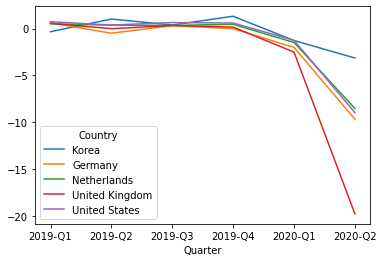

In [5]:
ax = d.loc["Q-on-Q GDP growth"].plot()
ax.figure.savefig("oecd-gdp-growth.jpg", dpi=300, transparent=False)

In [6]:
d = d
d

Country                       Korea   Germany  Netherlands  United Kingdom  \
                  Quarter                                                    
Q-on-Q GDP growth 2019-Q1 -0.339694  0.612223     0.506885        0.551074   
                  2019-Q2  1.014143 -0.503593     0.357658       -0.017924   
                  2019-Q3  0.375455  0.309311     0.330902        0.325823   
                  2019-Q4  1.311630 -0.018690     0.453475        0.149396   
                  2020-Q1 -1.281702 -2.018694    -1.494446       -2.522693   
                  2020-Q2 -3.153852 -9.690956    -8.542122      -19.810926   

Country                    United States  
                  Quarter                 
Q-on-Q GDP growth 2019-Q1       0.725123  
                  2019-Q2       0.370716  
                  2019-Q3       0.636915  
                  2019-Q4       0.586232  
                  2020-Q1      -1.262655  
                  2020-Q2      -8.986117

In [7]:
print(tablib.import_set(d.round(1).loc["Q-on-Q GDP growth"].T[["2019-Q3", "2019-Q4", "2020-Q1", "2020-Q2"]].reset_index()).export("rst"))

+-------------+---------+---------+---------+---------+
|   Country   | 2019-Q3 | 2019-Q4 | 2020-Q1 | 2020-Q2 |
+=============+=========+=========+=========+=========+
| Korea       | 0.4     | 1.3     | -1.3    | -3.2    |
+-------------+---------+---------+---------+---------+
| Germany     | 0.3     | -0.0    | -2.0    | -9.7    |
+-------------+---------+---------+---------+---------+
| Netherlands | 0.3     | 0.5     | -1.5    | -8.5    |
+-------------+---------+---------+---------+---------+
| United      | 0.3     | 0.1     | -2.5    | -19.8   |
| Kingdom     |         |         |         |         |
+-------------+---------+---------+---------+---------+
| United      | 0.6     | 0.6     | -1.3    | -9.0    |
| States      |         |         |         |         |
+-------------+---------+---------+---------+---------+


In [8]:
u = pd.read_csv("oecd-ue-rate.csv")

In [9]:
u["Measure"].unique()

array(['Level, ratio or index'], dtype=object)

In [10]:
u = u[["Country", "TIME", "Value"]].rename(columns={"TIME": "Month", "Value": "Unemployment rate"})

In [11]:
u = u.pivot(index="Country", columns="Month").round(2).T

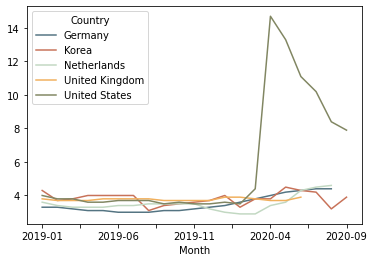

In [12]:
ax = u.loc["Unemployment rate"].plot(color=cl.get_colors("categorical", 5))

In [13]:
ax.figure.savefig("oecd-ue-rate.jpg", dpi=300, transparent=False)